### Problem Statement
- which person is having Diabetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('diabetes1.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Basic checks

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### EDA

<AxesSubplot:xlabel='Outcome', ylabel='count'>

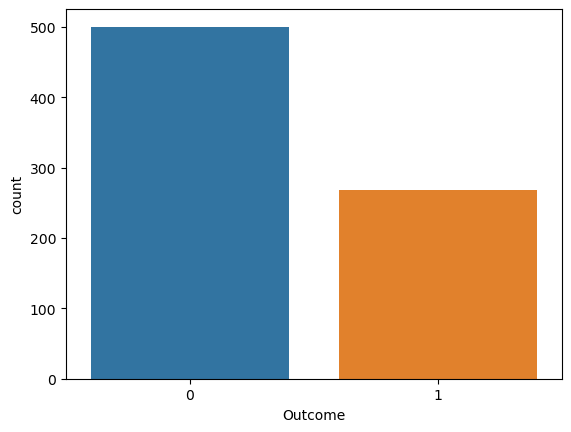

In [9]:
## countplot is plotted to check whether the data is balanced or not
## that means there should be equal number of records related to diabetic and non-diabetic
## another way to check if the data is balanced, use value_count
sns.countplot(x=data.Outcome)

In [10]:
## Insights
# clearly the data is imbalanced because we have more records related to non-diabetic than the diabetic ones

In [11]:
## count plot is always done if we have have to count certain things or if the data is discrete
## histplot is used if we want to see the distribution of the data or if the data is continous

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

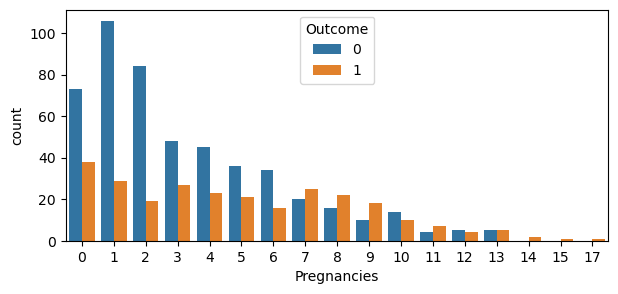

In [12]:
plt.figure(figsize=(7,3))
sns.countplot(x='Pregnancies',data=data,hue='Outcome')

In [13]:
## Insights
## as the number of pregnancies increases, the rate of diabetes is also increasing

In [14]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

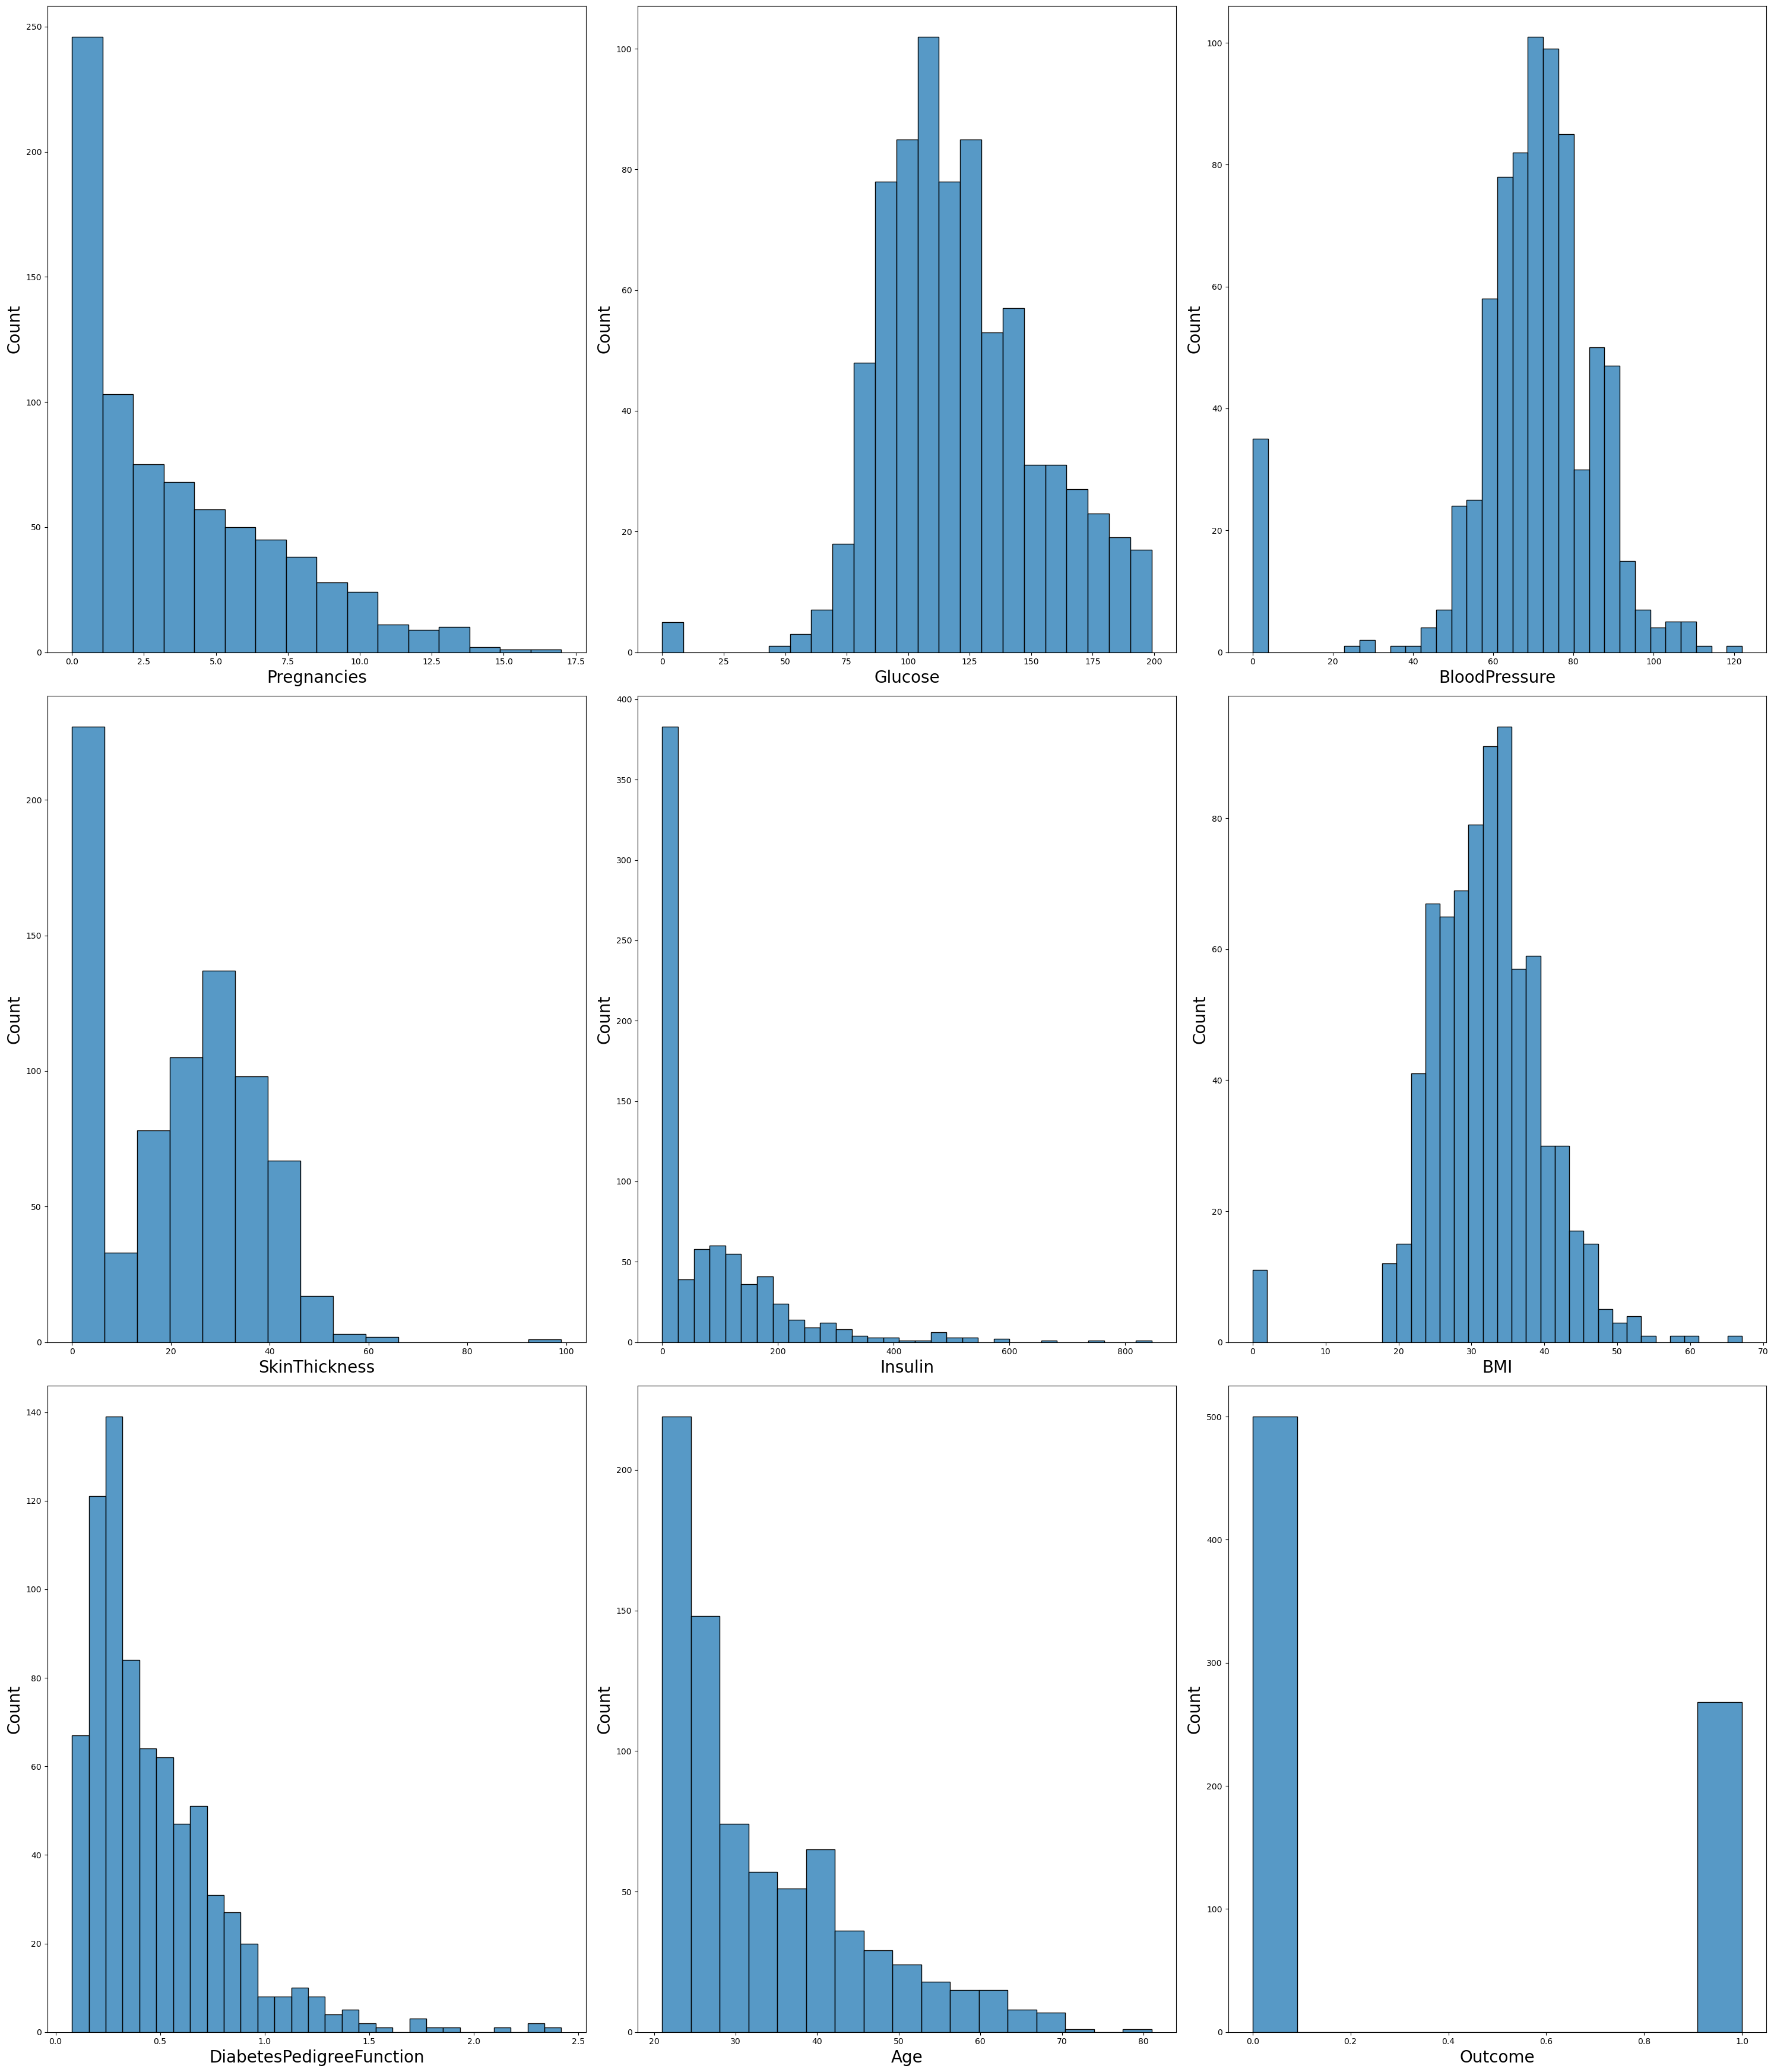

In [15]:
plt.figure(figsize=(30,35),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

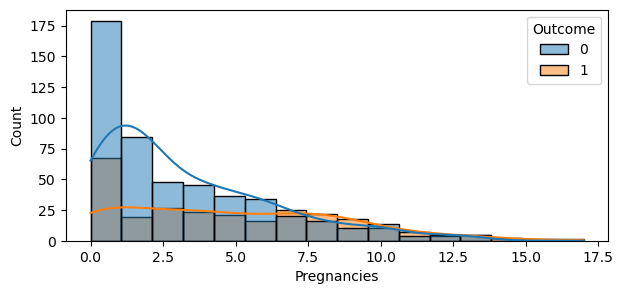

In [16]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='Pregnancies',kde=True,hue='Outcome')
plt.show()

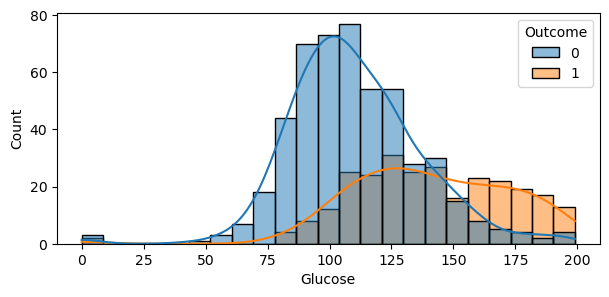

In [17]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='Glucose',kde=True,hue='Outcome')
plt.show()

In [18]:
### Insights
# if the glucose level is high, the chance of being diabetic is also high

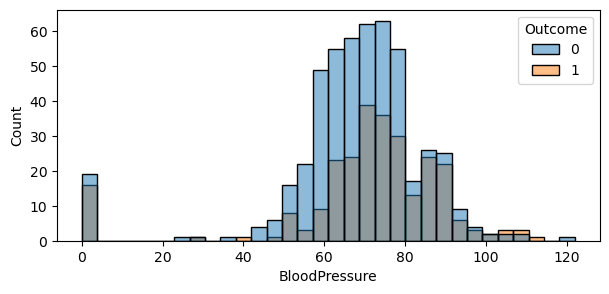

In [19]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='BloodPressure',hue='Outcome')
plt.show()

In [20]:
## Insights
# the chance of being  diabetic is less if BP is less or normal

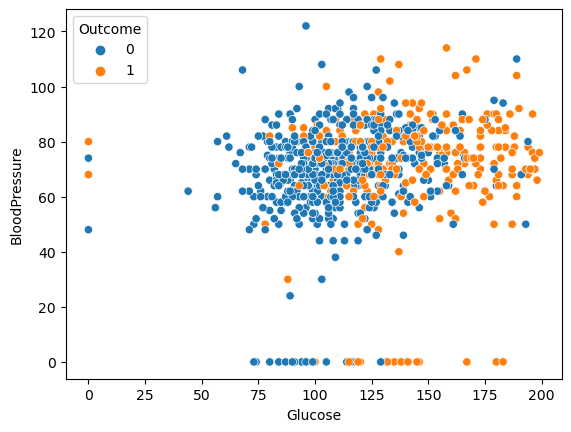

In [21]:
sns.scatterplot(data=data,x='Glucose',y='BloodPressure',hue='Outcome')
plt.show()

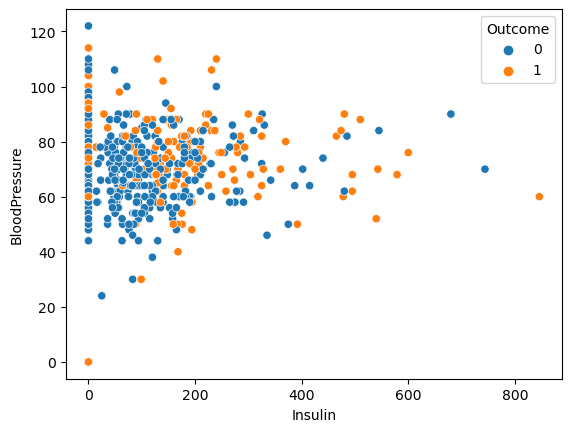

In [22]:
sns.scatterplot(data=data,x='Insulin',y='BloodPressure',hue='Outcome')
plt.show()

In [23]:
## the chance of being diabetic is less with low BP and low insulin
## the chance of being diabetic is high with NORMAL BP AND HIGH INSULIN LEVEL

### Data preprocessing

In [24]:
# checking null values
### NUMERICAL-REPLACE WITH MEAN(IF DATA IS NORMAL) OR MEDIAN(IF DATA IS NOT NORMAL/SKEWED)
### CATEGORICAL- REPLACE WITH MODE
# Outliers
# Balancing the data
# Scaling
# Dropping irrelevant columns
# Encoding

In [25]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
# CHECK FOR CORRUPTED DATA
# REPLACE ZEROS WITH RESPECTIVE MEAN AND MEDIAN

data.loc[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [28]:
data.loc[data['Glucose']==0,'Glucose'] = np.median(data['Glucose'])
data

##(OR) data['Glucose'].replace(0,data['Glucose'].median(),inplace=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
data.loc[data['BloodPressure']==0,'BloodPressure'] = np.median(data['BloodPressure'])
data.loc[data['SkinThickness']==0,'SkinThickness'] = np.median(data['SkinThickness'])
data.loc[data['Insulin']==0,'Insulin'] = np.median(data['Insulin'])
data.loc[data['BMI']==0,'BMI'] = np.median(data['BMI'])
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


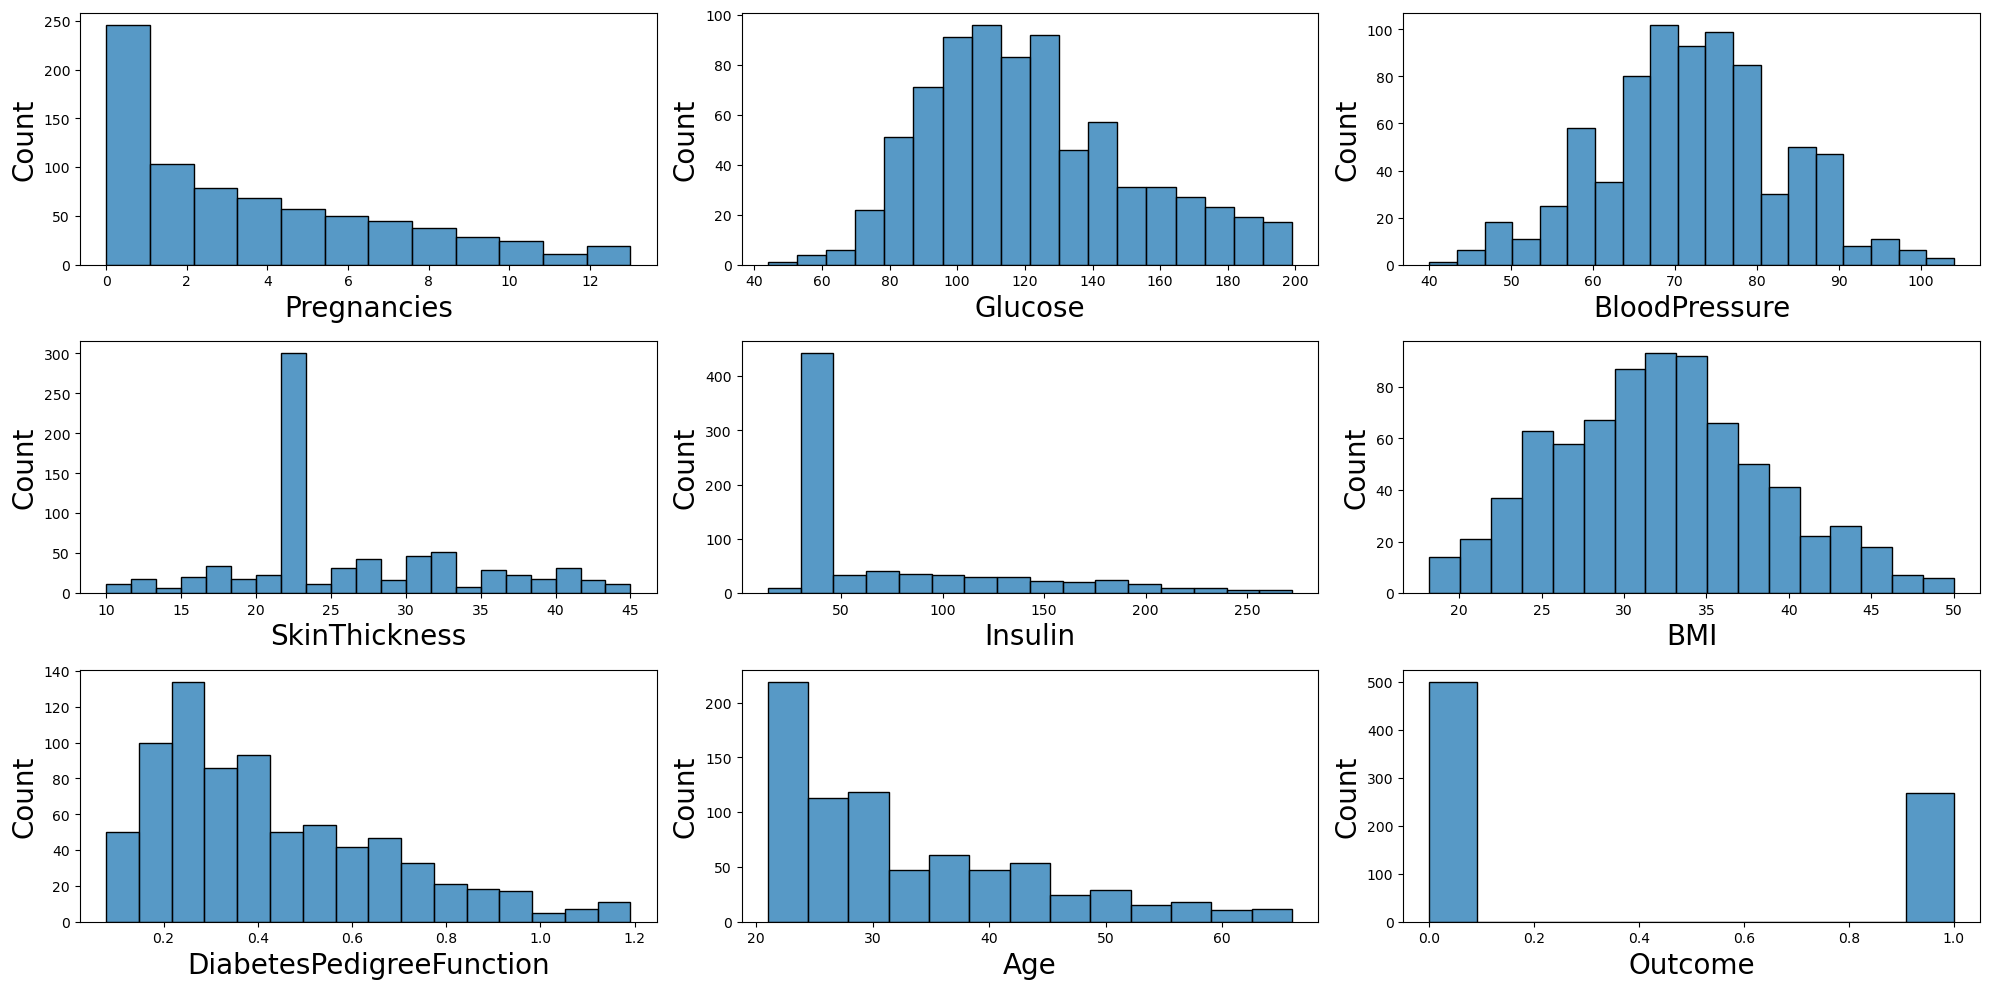

In [91]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [31]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


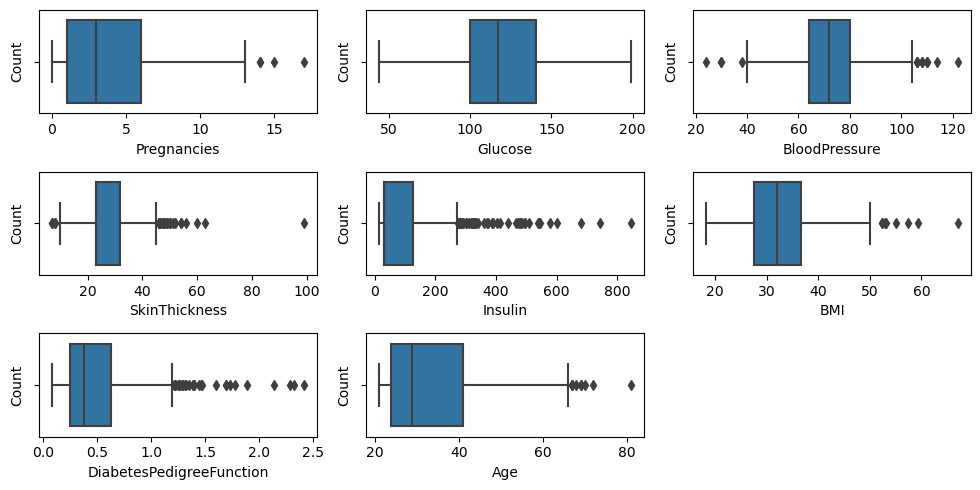

In [32]:
# check outliers by plotting boxplot


plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1

for column in data.drop('Outcome',axis=1):    # since we are not going to plot boxplot for th eoutcome column,drop it
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Handling outliers

In [33]:
## as we can see from the boxplot, we have outliers in all the columns except for the glucose column

In [34]:
Q1 = data['Pregnancies'].quantile(0.25)
Q3 = data['Pregnancies'].quantile(0.75)

In [35]:
IQR = Q3-Q1
IQR

5.0

In [36]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [37]:
data.loc[data['Pregnancies']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110.0,37.1,0.153,43,1
159,17,163,72,41,114.0,40.9,0.817,47,1
298,14,100,78,25,184.0,36.6,0.412,46,1
455,14,175,62,30,30.5,33.6,0.212,38,1


In [38]:
len(data.loc[data['Pregnancies']>upper_limit])/len(data)

0.005208333333333333

In [39]:
data.loc[data['Pregnancies']>upper_limit,'Pregnancies'] = data['Pregnancies'].median()

In [40]:
### for blood pressure
Q1 = data['BloodPressure'].quantile(0.25)
Q3 = data['BloodPressure'].quantile(0.75)

In [41]:
IQR = Q3-Q1
IQR

16.0

In [42]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [43]:
data.loc[data['BloodPressure']<lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30,38,83.0,43.3,0.183,33,0
125,1,88,30,42,99.0,55.0,0.496,26,1
597,1,89,24,19,25.0,27.8,0.559,21,0
599,1,109,38,18,120.0,23.1,0.407,26,0


In [44]:
data.loc[data['BloodPressure']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240.0,45.4,0.721,54,1
84,5,137,108,23,30.5,48.8,0.227,37,1
106,1,96,122,23,30.5,22.4,0.207,27,0
177,0,129,110,46,130.0,67.1,0.319,26,1
362,5,103,108,37,30.5,39.2,0.305,65,0
549,4,189,110,31,30.5,28.5,0.680,37,0
658,11,127,106,23,30.5,39.0,0.190,51,0
662,8,167,106,46,231.0,37.6,0.165,43,1
672,10,68,106,23,49.0,35.5,0.285,47,0
691,13,158,114,23,30.5,42.3,0.257,44,1


In [45]:
data.loc[data['BloodPressure']<lower_limit,'BloodPressure'] = data['BloodPressure'].median()
data.loc[data['BloodPressure']>upper_limit,'BloodPressure'] = data['BloodPressure'].median()

In [46]:
### for skin thickness
Q1 = data['SkinThickness'].quantile(0.25)
Q3 = data['SkinThickness'].quantile(0.75)

In [47]:
IQR = Q3-Q1
IQR

9.0

In [48]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [49]:
data.loc[data['SkinThickness']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
16,0,118,84,47,230.0,45.8,0.551,31,1
39,4,111,72,47,207.0,37.1,1.390,56,1
57,0,100,88,60,110.0,46.8,0.962,31,0
86,13,106,72,54,30.5,36.6,0.178,45,0
99,1,122,90,51,220.0,49.7,0.325,31,1
120,0,162,76,56,100.0,53.2,0.759,25,1
150,1,136,74,50,204.0,37.4,0.399,24,0
177,0,129,72,46,130.0,67.1,0.319,26,1
211,0,147,85,54,30.5,42.8,0.375,24,0
273,1,71,78,50,45.0,33.2,0.422,21,0


In [50]:
len(data.loc[data['SkinThickness']>upper_limit])/len(data)

0.040364583333333336

In [51]:
data.loc[data['SkinThickness']<lower_limit,'SkinThickness'] = data['SkinThickness'].median()
data.loc[data['SkinThickness']>upper_limit,'SkinThickness'] = data['SkinThickness'].median()

In [52]:
###  insulin
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)

In [53]:
IQR = Q3-Q1
IQR

96.75

In [54]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [55]:
data.loc[data['Insulin']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543.0,30.5,0.158,53,1
13,1,189,60,23,846.0,30.1,0.398,59,1
53,8,176,90,34,300.0,33.7,0.467,58,1
54,7,150,66,42,342.0,34.7,0.718,42,0
56,7,187,68,39,304.0,37.7,0.254,41,1
111,8,155,62,26,495.0,34.0,0.543,46,1
139,5,105,72,29,325.0,36.9,0.159,28,0
144,4,154,62,31,284.0,32.8,0.237,23,0
153,1,153,82,42,485.0,40.6,0.687,23,0
162,0,114,80,34,285.0,44.2,0.167,27,0


In [56]:
data.loc[data['Insulin']>upper_limit,'Insulin'] = data['Insulin'].median()

In [57]:
## BMI
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)

In [58]:
IQR = Q3-Q1
IQR

9.100000000000001

In [59]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [60]:
data.loc[data['BMI']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,23,100.00,53.2,0.759,25,1
125,1,88,72,42,99.00,55.0,0.496,26,1
177,0,129,72,23,130.00,67.1,0.319,26,1
193,11,135,72,23,30.50,52.3,0.578,40,1
247,0,165,90,33,31.25,52.3,0.427,23,0
303,5,115,98,23,30.50,52.9,0.209,28,1
445,0,180,78,23,14.00,59.4,2.420,25,1
673,3,123,100,35,240.00,57.3,0.880,22,0


In [61]:
data.loc[data['BMI']>upper_limit,'BMI'] = data['BMI'].median()

In [62]:
### diabetes pedigree function
Q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = data['DiabetesPedigreeFunction'].quantile(0.75)

In [63]:
IQR = Q3-Q1
IQR

0.38249999999999995

In [64]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [65]:
data.loc[data['DiabetesPedigreeFunction']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168.00,43.1,2.288,33,1
12,10,139,80,23,30.50,27.1,1.441,57,0
39,4,111,72,23,207.00,37.1,1.390,56,1
45,0,180,66,39,30.50,42.0,1.893,25,1
58,0,146,82,23,30.50,40.5,1.781,44,0
100,1,163,72,23,30.50,39.0,1.222,33,1
147,2,106,64,35,119.00,30.5,1.400,34,0
187,1,128,98,41,58.00,32.0,1.321,33,1
218,5,85,74,22,30.50,29.0,1.224,32,1
228,4,197,70,39,31.25,36.7,2.329,31,0


In [66]:
data.loc[data['DiabetesPedigreeFunction']>upper_limit,'DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].median()

In [67]:
## AGE
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

In [68]:
IQR = Q3-Q1
IQR

17.0

In [69]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [70]:
data.loc[data['Age']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,23,30.5,26.8,0.186,69,0
363,4,146,78,23,30.5,38.5,0.520,67,1
453,2,119,72,23,30.5,19.6,0.832,72,0
459,9,134,74,33,60.0,25.9,0.460,81,0
489,8,194,80,23,30.5,26.1,0.551,67,0
537,0,57,60,23,30.5,21.7,0.735,67,0
666,4,145,82,18,30.5,32.5,0.235,70,1
674,8,91,82,23,30.5,35.6,0.587,68,0
684,5,136,82,23,30.5,32.0,0.640,69,0


In [71]:
data.loc[data['Age']>upper_limit,'Age'] = data['Age'].median()

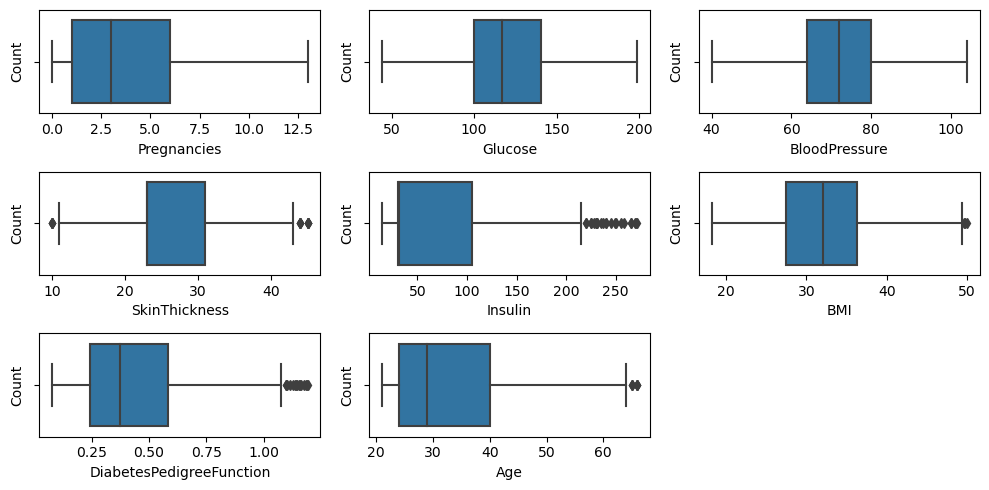

In [92]:
# checking outliers by plotting boxplot


plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1

for column in data.drop('Outcome',axis=1):    
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [93]:
## scaling
### we cannot scale discrete data, hence we are dropping the preg and outcome column to scale the numerical data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data.drop(['Pregnancies','Outcome'],axis=1))

In [94]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [95]:
data1 = pd.DataFrame(scaler_data,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

data1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.50000,0.714286,0.063953,0.484277,0.493261,0.644444
1,0.264516,0.40625,0.542857,0.063953,0.264151,0.245283,0.222222
2,0.896774,0.37500,0.371429,0.063953,0.160377,0.533693,0.244444
3,0.290323,0.40625,0.371429,0.310078,0.311321,0.079964,0.000000
4,0.600000,0.00000,0.714286,0.596899,0.783019,0.264600,0.266667
...,...,...,...,...,...,...,...
763,0.367742,0.56250,0.371429,0.643411,0.462264,0.083558,0.933333
764,0.503226,0.46875,0.485714,0.063953,0.584906,0.235400,0.133333
765,0.496774,0.50000,0.371429,0.379845,0.251572,0.150045,0.200000
766,0.529032,0.31250,0.371429,0.063953,0.374214,0.243486,0.577778


In [96]:
data2 = data[['Pregnancies','Outcome']]

In [97]:
data_new = pd.concat([data1,data2],axis=1)
data_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.50000,0.714286,0.063953,0.484277,0.493261,0.644444,6,1
1,0.264516,0.40625,0.542857,0.063953,0.264151,0.245283,0.222222,1,0
2,0.896774,0.37500,0.371429,0.063953,0.160377,0.533693,0.244444,8,1
3,0.290323,0.40625,0.371429,0.310078,0.311321,0.079964,0.000000,1,0
4,0.600000,0.00000,0.714286,0.596899,0.783019,0.264600,0.266667,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.56250,0.371429,0.643411,0.462264,0.083558,0.933333,10,0
764,0.503226,0.46875,0.485714,0.063953,0.584906,0.235400,0.133333,2,0
765,0.496774,0.50000,0.371429,0.379845,0.251572,0.150045,0.200000,5,0
766,0.529032,0.31250,0.371429,0.063953,0.374214,0.243486,0.577778,1,1


### Splitting the data

In [98]:
X = data_new.iloc[:,:-1]
# X = data.drop('Outcome',axis=1)
y = data.Outcome

In [99]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


### Model creation

In [101]:
### training

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [102]:
from sklearn.metrics import accuracy_score

y_train_pred = logistic.predict(x_train)
accuracy_score(y_train,y_train_pred)

0.7616387337057728

In [103]:
## Testing accuracy
## make predictions using x_test

y_pred = logistic.predict(x_test)

accuracy_score(y_test,y_pred)

0.7705627705627706

In [104]:
y_pred = logistic.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [105]:
accuracy_score(y_test,y_pred)

0.7705627705627706

In [85]:
probability_values = logistic.predict_proba(x_test)
probability_values

array([[0.92905138, 0.07094862],
       [0.80338905, 0.19661095],
       [0.85360739, 0.14639261],
       [0.74973069, 0.25026931],
       [0.43262841, 0.56737159],
       [0.88156601, 0.11843399],
       [0.91578722, 0.08421278],
       [0.63527783, 0.36472217],
       [0.92485919, 0.07514081],
       [0.55789213, 0.44210787],
       [0.59937583, 0.40062417],
       [0.58829463, 0.41170537],
       [0.46071281, 0.53928719],
       [0.77313557, 0.22686443],
       [0.95040562, 0.04959438],
       [0.18272881, 0.81727119],
       [0.2937529 , 0.7062471 ],
       [0.95691354, 0.04308646],
       [0.78154593, 0.21845407],
       [0.14935741, 0.85064259],
       [0.05219959, 0.94780041],
       [0.47456643, 0.52543357],
       [0.85469096, 0.14530904],
       [0.55566235, 0.44433765],
       [0.89298791, 0.10701209],
       [0.84955629, 0.15044371],
       [0.30160627, 0.69839373],
       [0.45968605, 0.54031395],
       [0.79777295, 0.20222705],
       [0.64813022, 0.35186978],
       [0.

### Evaluation

#### Accuracy score

In [86]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,precision_score

In [87]:
accuracy_score(y_test,y_pred)

0.7705627705627706

In [88]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_smote))

In [ ]:
y_train.value_counts()

In [ ]:
y_train_smote.value_counts()

### Evaluation

In [106]:
# Accuracy score
accuracy_score(y_test,y_pred)

0.7705627705627706

In [107]:
confusion_matrix(y_test,y_pred)

array([[140,  15],
       [ 38,  38]], dtype=int64)

In [108]:
precision_score(y_test,y_pred)     # responsible for type1 error

0.7169811320754716

In [109]:
recall_score(y_test,y_pred)       # responsible for type2 error

0.5

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       155
           1       0.72      0.50      0.59        76

    accuracy                           0.77       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



In [111]:
roc_auc_score(y_test,y_pred)

0.7016129032258064

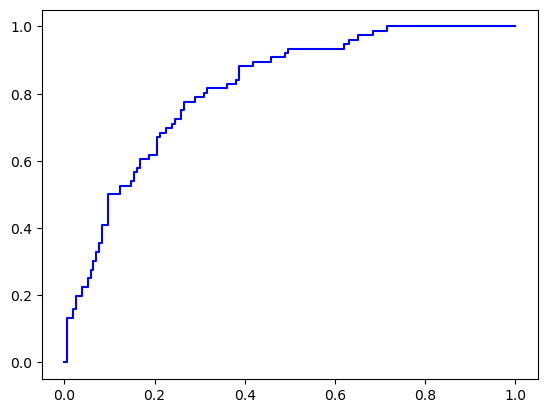

In [112]:
import  matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_predict = logistic.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict)
plt.plot(fpr,tpr,color='blue')
plt.show()

In [ ]:
### since the AUC curve has more area, the model is better

In [ ]:
## splitting data

X = iris.drop('Species',axis=1)
y = iris.Species

In [ ]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()
y = lc.fit_transform(y)
y

In [ ]:
iris

In [ ]:
## Train,test splitting
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

In [ ]:
## Model Implementation

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train1,y_train1)

In [ ]:
y_prediction = model.predict(x_test1)
y_prediction

In [ ]:
y_test1

In [ ]:
# Model evaluations

accuracy_score(y_test1,y_prediction)

In [ ]:
confusion_matrix(y_test1,y_prediction)

In [ ]:
print(classification_report(y_test1,y_prediction))

In [ ]:
pd.crosstab(y_test1,y_prediction)

In [ ]:
sns.heatmap(confusion_matrix(y_test1,y_prediction),annot=True)